### データの解像度に起因するバイアス

In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from tqdm import trange
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from data_gen import data_pattern1, data_pattern2, data_pattern3

In [2]:
def show_result(datagenerator,Classifier,n_iter=1000, n_est=100, bagging=True):
    result=[]
    for i in trange(n_iter):
        data,target=datagenerator(random_state=i)
        clf=Classifier(n_estimators=n_est,random_state=i+2019*i,bootstrap=bagging)
        clf.fit(data,target)
        result.append(clf.feature_importances_)
    result=pd.DataFrame(result)
    sns.violinplot(data=result)
    plt.show()

### まずは分散を変えた正規分布について

100%|██████████| 200/200 [00:10<00:00, 18.93it/s]


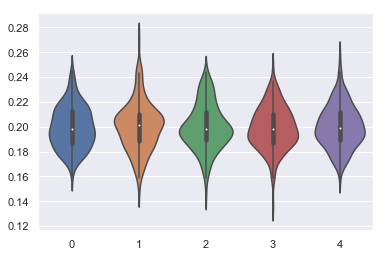

In [3]:
show_result(data_pattern1,RandomForestClassifier,n_iter=200,n_est=50)

バイアスなし！

### 次に、解像度を下げたデータに対して

100%|██████████| 200/200 [00:10<00:00, 19.53it/s]


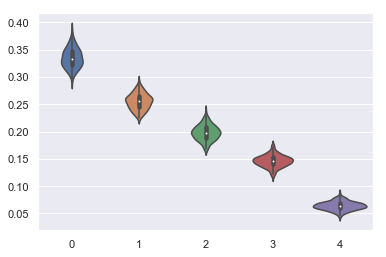

In [4]:
show_result(data_pattern2,RandomForestClassifier,n_iter=200,n_est=50)

100%|██████████| 200/200 [00:10<00:00, 18.50it/s]


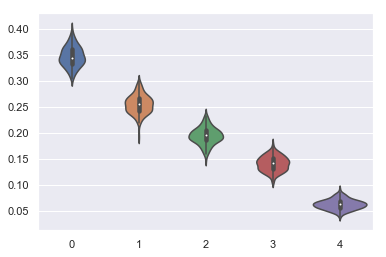

In [5]:
show_result(data_pattern2,RandomForestClassifier,n_iter=200,n_est=50,bagging=False)

バイアスあり！！！
でも論文の主張と違ってbaggingの有無で明確な差は出ず

### extratreeではどう？

100%|██████████| 200/200 [00:09<00:00, 22.03it/s]


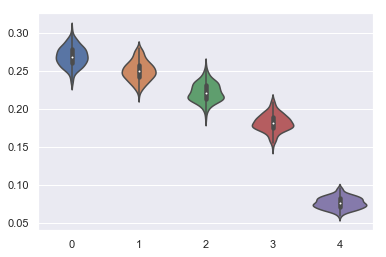

In [6]:
show_result(data_pattern2,ExtraTreesClassifier,n_iter=200,n_est=50)

100%|██████████| 200/200 [00:09<00:00, 22.06it/s]


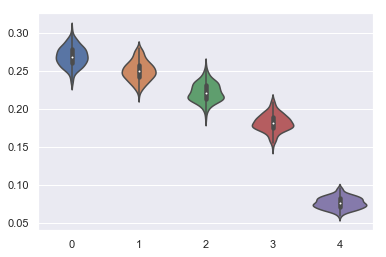

In [7]:
show_result(data_pattern2,ExtraTreesClassifier,n_iter=200,n_est=50)

100%|██████████| 200/200 [00:36<00:00,  5.40it/s]


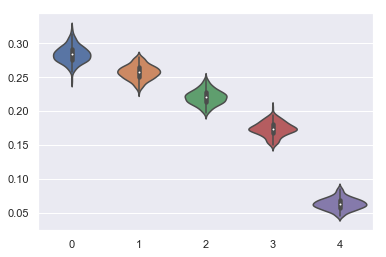

In [8]:
show_result(data_pattern2,ExtraTreesClassifier,n_iter=200,n_est=200,bagging=False)

extratreeでもバイアスあり！
(各特徴量に対してsplit pointはランダムで決めるけど、結局一番不純度の改善が良かった特徴量が選ばれるためバイアスが出るのではないか？)

これに関してもbaggingの有無は関係なかった。

### 分布ごとにバイアスがあるか否か

100%|██████████| 200/200 [00:11<00:00, 19.14it/s]


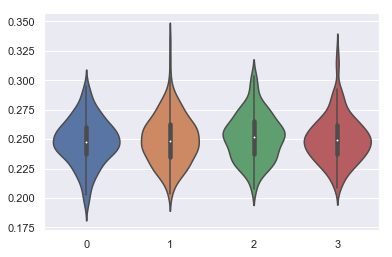

In [9]:
show_result(data_pattern3, RandomForestClassifier,n_iter=200,n_est=50)

なさそう